In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kenai us
rikitea pf
rikitea pf
khatanga ru
punta arenas cl
hobart au
darhan mn
gradignan fr
ushuaia ar
kruisfontein za
asau tv
albany au
yellowknife ca
karaman tr
neiafu to
fortuna us
illoqqortoormiut gl
saint george bm
airai pw
anshun cn
komsomolskiy ru
baruun-urt mn
punta arenas cl
rikitea pf
cape town za
nikel ru
ushuaia ar
rikitea pf
punta arenas cl
mataura pf
montrose us
minas uy
nikolayevka ru
qaanaaq gl
bluff nz
amderma ru
barentsburg sj
punta arenas cl
busselton au
salalah om
napa us
alofi nu
punta arenas cl
balaka mw
ponta do sol cv
busselton au
vaini to
carnarvon au
belushya guba ru
kaeo nz
castro cl
cape town za
punta arenas cl
hobart au
avarua ck
dingle ie
kushima jp
samusu ws
grand gaube mu
san jose gt
isangel vu
nizhneyansk ru
pangody ru
avarua ck
bluff nz
mount gambier au
athabasca ca
busselton au
avarua ck
ushuaia ar
tasiilaq gl
mataura pf
samusu ws
vaitupu wf
ribeira grande pt
dikson ru
vaini to
busselton au
iqaluit ca
jamestown sh
penha br
ixtapa mx
belushya guba ru
t

cape town za
hithadhoo mv
hobart au
assare br
mukhen ru
cape town za
champua in
geraldton au
cumana ve
zhezkazgan kz
hermanus za
nome us
chokurdakh ru
rikitea pf
betsiamites ca
ancud cl
vaini to
terrasini it
acapulco mx
ushuaia ar
santa cruz cr
znamenskoye ru
zhigansk ru
marcona pe
rio gallegos ar
abalak ne
saint george bm
hithadhoo mv
rikitea pf
ushuaia ar
samarai pg
grindavik is
mantsala fi
rikitea pf
rikitea pf
taolanaro mg
iqaluit ca
havre-saint-pierre ca
mataura pf
luderitz na
portland au
kapaa us
bengkulu id
barentsburg sj
grand river south east mu
nurota uz
klaksvik fo
arraial do cabo br
hermanus za
avarua ck
volokonovka ru
pangnirtung ca
moose factory ca
taolanaro mg
santa rosa bo
busselton au
ushuaia ar
asau tv
hasaki jp
sao filipe cv
port alfred za
thompson ca
hermanus za
rikitea pf
la ronge ca
saskylakh ru
nouadhibou mr
buala sb
biggar gb
lebu cl
rikitea pf
hermanus za
vaini to
nalut ly
vaini to
vestmannaeyjar is
sao gabriel da cachoeira br
severo-kurilsk ru
nome us
punta ar

dingle ie
coihaique cl
faanui pf
churapcha ru
ushuaia ar
avarua ck
albany au
dunedin nz
kamaishi jp
marawi sd
illoqqortoormiut gl
hermanus za
derzhavinsk kz
beni mazar eg
ushuaia ar
belushya guba ru
rakovski bg
ushuaia ar
nizhniy tagil-39 ru
rawson ar
hermanus za
shache cn
samusu ws
ushuaia ar
dustlik uz
tromso no
carnarvon au
kloulklubed pw
rikitea pf
kodiak us
chokurdakh ru


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | kenai
Processing Record 2 of Set 13 | rikitea
Processing Record 3 of Set 13 | khatanga
Processing Record 4 of Set 13 | punta arenas
Processing Record 5 of Set 13 | hobart
Processing Record 6 of Set 13 | darhan
Processing Record 7 of Set 13 | gradignan
Processing Record 8 of Set 13 | ushuaia
Processing Record 9 of Set 13 | kruisfontein
Processing Record 10 of Set 13 | asau
Processing Record 11 of Set 13 | albany
Processing Record 12 of Set 13 | yellowknife
Processing Record 13 of Set 13 | karaman
Processing Record 14 of Set 13 | neiafu
Processing Record 15 of Set 13 | fortuna
Processing Record 16 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 13 | saint george
Processing Record 18 of Set 13 | airai
Processing Record 19 of Set 13 | anshun
Processing Record 20 of Set 13 | komsomolskiy
Processing Record 21 of Set 13 | baruun-urt
Processing Record 22 of Set 13 | cape town
Processing Record 23 of Set 13 | nikel
Processing 

Processing Record 36 of Set 16 | beloha
Processing Record 37 of Set 16 | asyut
Processing Record 38 of Set 16 | bandarbeyla
Processing Record 39 of Set 16 | mistelbach
Processing Record 40 of Set 16 | nizhnevartovsk
Processing Record 41 of Set 16 | hasaki
Processing Record 42 of Set 16 | bredasdorp
Processing Record 43 of Set 16 | lebu
Processing Record 44 of Set 16 | halifax
Processing Record 45 of Set 16 | rawson
Processing Record 46 of Set 16 | abidjan
Processing Record 47 of Set 16 | steamboat springs
Processing Record 48 of Set 16 | sidi bu zayd
City not found. Skipping...
Processing Record 49 of Set 16 | camacha
Processing Record 50 of Set 16 | salym
Processing Record 1 of Set 17 | khorixas
Processing Record 2 of Set 17 | talnakh
Processing Record 3 of Set 17 | ilulissat
Processing Record 4 of Set 17 | umzimvubu
City not found. Skipping...
Processing Record 5 of Set 17 | broome
Processing Record 6 of Set 17 | cherskiy
Processing Record 7 of Set 17 | faanui
Processing Record 8 of 

Processing Record 23 of Set 20 | abong mbang
Processing Record 24 of Set 20 | port hardy
Processing Record 25 of Set 20 | rabo de peixe
Processing Record 26 of Set 20 | sierra vista
Processing Record 27 of Set 20 | acapulco
Processing Record 28 of Set 20 | seymchan
Processing Record 29 of Set 20 | lata
Processing Record 30 of Set 20 | esperance
Processing Record 31 of Set 20 | narasannapeta
Processing Record 32 of Set 20 | sulangan
Processing Record 33 of Set 20 | sar-e pul
Processing Record 34 of Set 20 | kloulklubed
Processing Record 35 of Set 20 | mahibadhoo
Processing Record 36 of Set 20 | saleaula
City not found. Skipping...
Processing Record 37 of Set 20 | kudeyevskiy
Processing Record 38 of Set 20 | shingu
Processing Record 39 of Set 20 | los llanos de aridane
Processing Record 40 of Set 20 | sitka
Processing Record 41 of Set 20 | assare
Processing Record 42 of Set 20 | mukhen
Processing Record 43 of Set 20 | champua
Processing Record 44 of Set 20 | geraldton
Processing Record 4

Processing Record 9 of Set 24 | laje
Processing Record 10 of Set 24 | pemangkat
Processing Record 11 of Set 24 | mangrol
Processing Record 12 of Set 24 | safaqis
City not found. Skipping...
Processing Record 13 of Set 24 | zaraza
Processing Record 14 of Set 24 | barmstedt
Processing Record 15 of Set 24 | saint-joseph
Processing Record 16 of Set 24 | tome-acu
City not found. Skipping...
Processing Record 17 of Set 24 | qabis
City not found. Skipping...
Processing Record 18 of Set 24 | iskateley
Processing Record 19 of Set 24 | nachingwea
Processing Record 20 of Set 24 | severnyy
Processing Record 21 of Set 24 | grand-santi
Processing Record 22 of Set 24 | batemans bay
Processing Record 23 of Set 24 | llanelli
Processing Record 24 of Set 24 | hanyang
Processing Record 25 of Set 24 | sopelana
Processing Record 26 of Set 24 | sarai naurang
Processing Record 27 of Set 24 | mwingi
Processing Record 28 of Set 24 | puerto del rosario
Processing Record 29 of Set 24 | nador
Processing Record 30 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kenai,60.5544,-151.2583,14.00,79,75,3.44,US,2021-03-27 15:17:07
1,Rikitea,-23.1203,-134.9692,78.55,73,33,20.09,PF,2021-03-27 15:17:07
2,Khatanga,71.9667,102.5000,4.41,94,100,6.93,RU,2021-03-27 15:17:07
3,Punta Arenas,-53.1500,-70.9167,57.20,67,75,11.50,CL,2021-03-27 15:12:37
4,Hobart,-42.8794,147.3294,53.60,71,75,11.50,AU,2021-03-27 15:13:32
5,Darhan,49.4867,105.9228,17.62,82,4,2.55,MN,2021-03-27 15:17:08
6,Gradignan,44.7726,-0.6139,62.01,41,0,5.75,FR,2021-03-27 15:17:08
7,Ushuaia,-54.8000,-68.3000,55.40,67,75,6.91,AR,2021-03-27 15:17:09
8,Kruisfontein,-34.0033,24.7314,66.99,69,19,11.01,ZA,2021-03-27 15:17:09
9,Asau,46.4333,26.4000,55.99,26,8,3.76,RO,2021-03-27 15:17:09


In [12]:
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kenai,US,2021-03-27 15:17:07,60.5544,-151.2583,14.00,79,75,3.44
1,Rikitea,PF,2021-03-27 15:17:07,-23.1203,-134.9692,78.55,73,33,20.09
2,Khatanga,RU,2021-03-27 15:17:07,71.9667,102.5000,4.41,94,100,6.93
3,Punta Arenas,CL,2021-03-27 15:12:37,-53.1500,-70.9167,57.20,67,75,11.50
4,Hobart,AU,2021-03-27 15:13:32,-42.8794,147.3294,53.60,71,75,11.50
5,Darhan,MN,2021-03-27 15:17:08,49.4867,105.9228,17.62,82,4,2.55
6,Gradignan,FR,2021-03-27 15:17:08,44.7726,-0.6139,62.01,41,0,5.75
7,Ushuaia,AR,2021-03-27 15:17:09,-54.8000,-68.3000,55.40,67,75,6.91
8,Kruisfontein,ZA,2021-03-27 15:17:09,-34.0033,24.7314,66.99,69,19,11.01
9,Asau,RO,2021-03-27 15:17:09,46.4333,26.4000,55.99,26,8,3.76


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

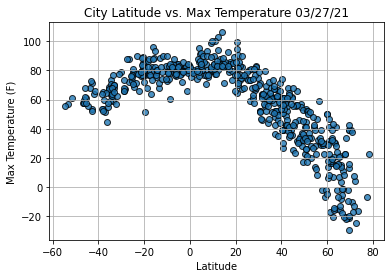

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

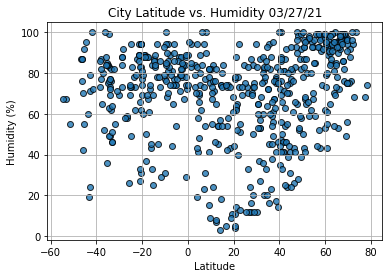

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

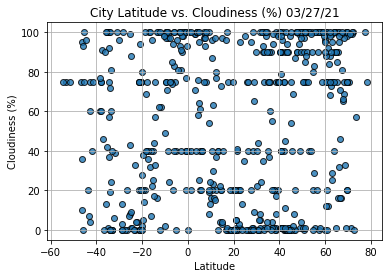

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

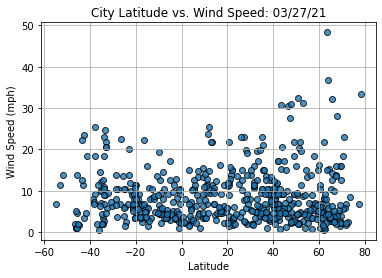

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed: "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

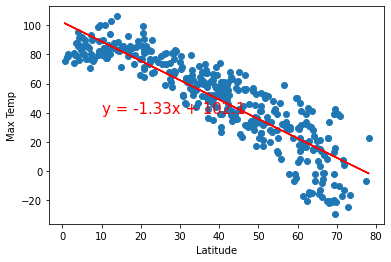

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

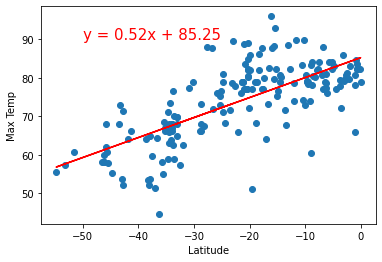

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

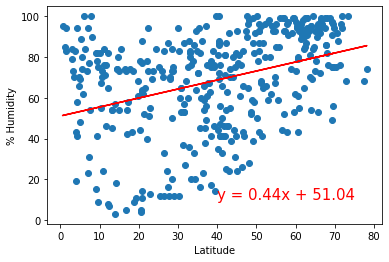

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

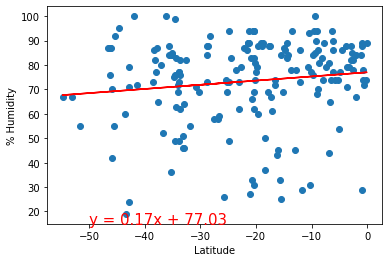

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

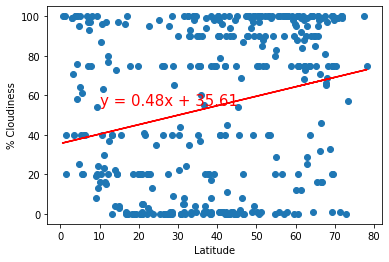

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

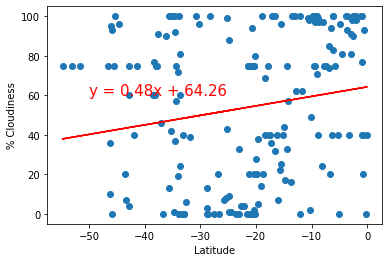

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

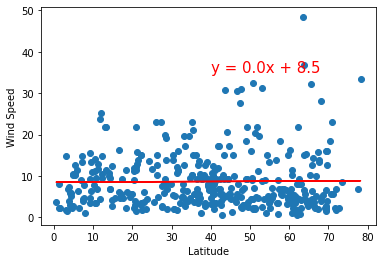

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35)) 


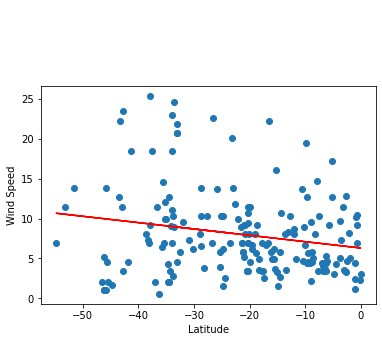

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))